In [2]:
import numpy as np
import pandas as pd

# Define the electrode positions from the 10-20 system diagram
electrodes = [
    "Fp1", "Fp2", "F7", "F3", "Fz", "F4", "F8", 
    "T3", "C3", "Cz", "C4", "T4", 
    "T5", "P3", "Pz", "P4", "T6", 
    "O1", "O2"
]

# Define adjacency based on proximity in the 10-20 system
edges = [
    ("Fp1", "F7"), ("Fp1", "F3"), ("Fp1", "Fz"), ("Fp1", "Fp2"),
    ("Fp2", "Fz"), ("Fp2", "F4"), ("Fp2", "F8"), 
    ("F7", "F3"), ("F7", "T3"), 
    ("F3", "Fz"), ("F3", "C3"), 
    ("Fz", "F4"), ("Fz", "Cz"), 
    ("F4", "C4"), ("F4", "F8"), 
    ("F8", "T4"), 
    ("T3", "C3"), ("T3", "T5"), 
    ("C3", "Cz"), ("C3", "P3"), 
    ("Cz", "C4"), ("Cz", "Pz"), 
    ("C4", "P4"), ("C4", "T4"), 
    ("T4", "T6"), 
    ("T5", "P3"), ("T5", "O1"), 
    ("P3", "Pz"), ("P3", "O1"), 
    ("Pz", "P4"), ("Pz", "O2"), 
    ("P4", "T6"), ("P4", "O2"), 
    ("T6", "O2"), ("O1", "O2")
]

# Create adjacency matrix
adj_matrix = np.zeros((len(electrodes), len(electrodes)), dtype=int)
electrode_indices = {elec: i for i, elec in enumerate(electrodes)}

# Fill adjacency matrix based on edges
for e1, e2 in edges:
    i, j = electrode_indices[e1], electrode_indices[e2]
    adj_matrix[i, j] = 1
    adj_matrix[j, i] = 1  # Since it's undirected

# Convert to DataFrame for better visualization
adj_df = pd.DataFrame(adj_matrix, index=electrodes, columns=electrodes)

# Display the adjacency matrix
print(adj_df)


     Fp1  Fp2  F7  F3  Fz  F4  F8  T3  C3  Cz  C4  T4  T5  P3  Pz  P4  T6  O1  \
Fp1    0    1   1   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   
Fp2    1    0   0   0   1   1   1   0   0   0   0   0   0   0   0   0   0   0   
F7     1    0   0   1   0   0   0   1   0   0   0   0   0   0   0   0   0   0   
F3     1    0   1   0   1   0   0   0   1   0   0   0   0   0   0   0   0   0   
Fz     1    1   0   1   0   1   0   0   0   1   0   0   0   0   0   0   0   0   
F4     0    1   0   0   1   0   1   0   0   0   1   0   0   0   0   0   0   0   
F8     0    1   0   0   0   1   0   0   0   0   0   1   0   0   0   0   0   0   
T3     0    0   1   0   0   0   0   0   1   0   0   0   1   0   0   0   0   0   
C3     0    0   0   1   0   0   0   1   0   1   0   0   0   1   0   0   0   0   
Cz     0    0   0   0   1   0   0   0   1   0   1   0   0   0   1   0   0   0   
C4     0    0   0   0   0   1   0   0   0   1   0   1   0   0   0   1   0   0   
T4     0    0   0   0   0   

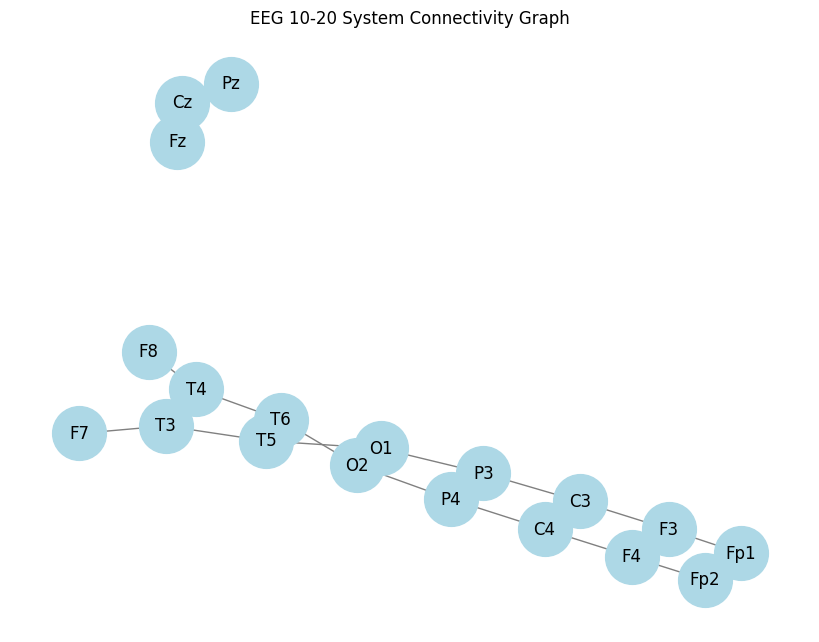

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define EEG 10-20 electrode locations (simplified)
eeg_electrodes = [
    "Fp1", "Fp2", "F3", "F4", "C3", "C4", "P3", "P4", "O1", "O2",
    "F7", "F8", "T3", "T4", "T5", "T6", "Fz", "Cz", "Pz"
]

# Define predefined connections based on 10-20 system
connections = [
    ("Fp1", "F3"), ("Fp2", "F4"), ("F3", "C3"), ("F4", "C4"),
    ("C3", "P3"), ("C4", "P4"), ("P3", "O1"), ("P4", "O2"),
    ("F7", "T3"), ("F8", "T4"), ("T3", "T5"), ("T4", "T6"),
    ("T5", "O1"), ("T6", "O2"), ("Fz", "Cz"), ("Cz", "Pz"),
    ("Fp1", "Fp2"), ("F3", "F4"), ("C3", "C4"), ("P3", "P4"),
    ("O1", "O2"), ("T3", "T4"), ("T5", "T6")
]

# Create adjacency matrix
num_nodes = len(eeg_electrodes)
A = np.zeros((num_nodes, num_nodes))

# Populate adjacency matrix
for (e1, e2) in connections:
    i, j = eeg_electrodes.index(e1), eeg_electrodes.index(e2)
    A[i, j] = A[j, i] = 1  # Symmetric adjacency matrix

# Visualize the EEG Graph
G = nx.Graph()
G.add_nodes_from(eeg_electrodes)
G.add_edges_from(connections)

plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1500)
plt.title("EEG 10-20 System Connectivity Graph")
plt.show()
